In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Create a function to calculate ECDF given a column series
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y  

In [3]:
df = pd.read_csv('Sheffield.csv')

In [4]:
df.tail()

,yyyy,mm,tmax,tmin,af,rain,sun
1597,2016,2,7.8,2,5,68.6,96.1
1598,2016,3,9.1,2.9,2,87.2,98.6
1599,2016,4,11.6,3.8,1,65.8,154.9
1600,2016,5,16.9,7.9,0,58.2,164.5
1601,2016,6,18.8,11.1,0,130.4,106.5


In [22]:
mod = df.query('yyyy > 2000 and yyyy < 2015 and rain < 200')

In [23]:
rainfall = mod.rain

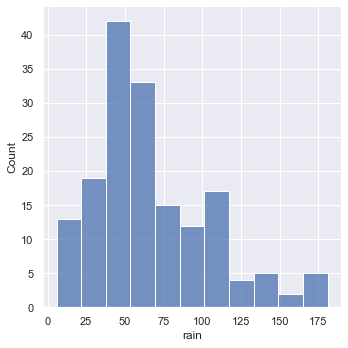

In [24]:
sns.displot(rainfall)

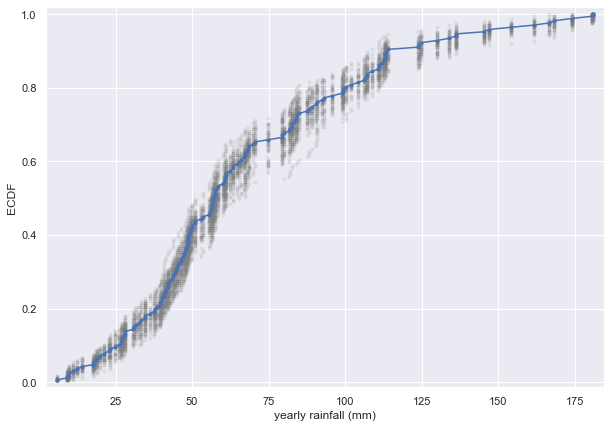

In [25]:
sns.set()
fig, ax = plt.subplots(figsize=(10,7))

for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

## Create a Bootstrap replicate function

In [26]:
# Bootstrap replicate function
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [28]:
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(rainfall, np.mean)

TypeError: 'norm' must be an instance of matplotlib.colors.Normalize or None, not a bool

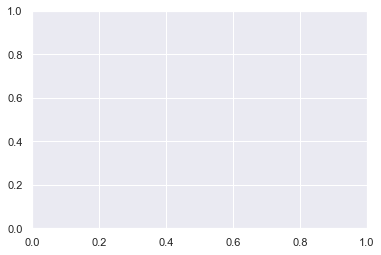

In [37]:
# Plot out the histogram
plt.hist(bs_replicates, bins=30,)